<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/k2_pix_small.png">
*This notebook contains an excerpt instructional material from [gully](https://twitter.com/gully_) and the [K2 Guest Observer Office](https://keplerscience.arc.nasa.gov/); the content is available [on GitHub](https://github.com/gully/goldenrod).*


<!--NAVIGATION-->
< [Spot-check Everest Validation Summaries for KEGS](01.06-Everest_KEGS_DVS.ipynb) | [Contents](Index.ipynb) | [Supernova Searches](02.00-Supernova_searches.ipynb) >

# Exploratory analysis of K2 transient light curves

In this notebook we examine a *known* transient event captured by K2.

Overview:

1. Retrieve data from MAST
2. Look at the lightcurve
3. Look at the TPF
4. Compare to EVEREST

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1. Retrieve data from MAST

Here is a known transient:  
[EPIC 212593538 interactive on MAST](https://archive.stsci.edu/canvas/k2hlsp_plot.html?k2=212593538&c=6&type=LC)  
[EPIC 212593538 links to lightcurves and TPF](https://archive.stsci.edu/k2/preview.php?dsn=KTWO212593538-C06&type=LC)



Save and download the files linked above to `../data`.  Let's look at the lightcurve first.

In [2]:
hdu = fits.open('../data/ktwo212593538-c06_llc.fits')

In [3]:
hdu.info()

Filename: ../data/ktwo212593538-c06_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      54   ()      
  1  LIGHTCURVE    1 BinTableHDU    155   3863R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (8, 8)   int32   


Examine the aperture.

In [4]:
hdu_ap = hdu['APERTURE']

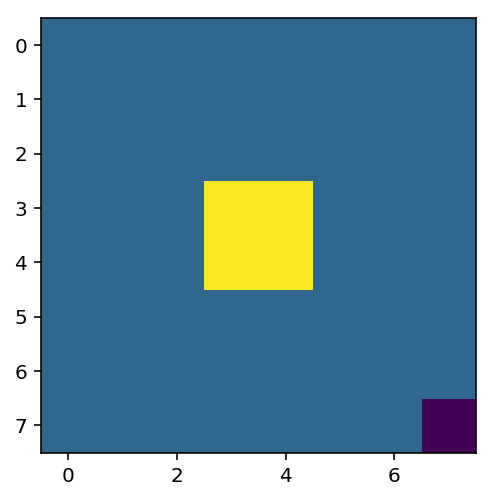

In [5]:
plt.imshow(hdu_ap.data)

In [6]:
dat = hdu['LIGHTCURVE'].data

In [7]:
dat.shape

(3863,)

In [8]:
len(dat[0])

20

In [9]:
dat.names

['TIME',
 'TIMECORR',
 'CADENCENO',
 'SAP_FLUX',
 'SAP_FLUX_ERR',
 'SAP_BKG',
 'SAP_BKG_ERR',
 'PDCSAP_FLUX',
 'PDCSAP_FLUX_ERR',
 'SAP_QUALITY',
 'PSF_CENTR1',
 'PSF_CENTR1_ERR',
 'PSF_CENTR2',
 'PSF_CENTR2_ERR',
 'MOM_CENTR1',
 'MOM_CENTR1_ERR',
 'MOM_CENTR2',
 'MOM_CENTR2_ERR',
 'POS_CORR1',
 'POS_CORR2']

In [10]:
dat['TIME']

array([ 2384.4632718 ,  2384.48370406,  2384.50413641, ...,  2463.33005237,
        2463.35048422,  2463.37091607])

(2390, 2420)

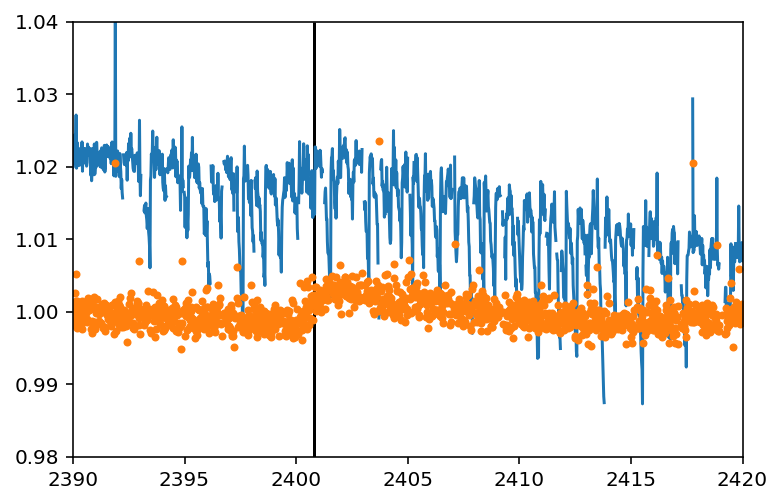

In [11]:
plt.plot(dat['TIME'], dat['SAP_FLUX']/np.nanmedian(dat['SAP_FLUX']))
plt.plot(dat['TIME'], dat['PDCSAP_FLUX']/np.nanmedian(dat['PDCSAP_FLUX']), '.')
plt.vlines(dat['TIME'][800], 0.98, 1.04)
plt.ylim(0.98, 1.04)
plt.xlim(2390, 2420)

PDC might not be useful for Supernova signals, even though it mitigates some instrumental artifacts.

(2390, 2420)

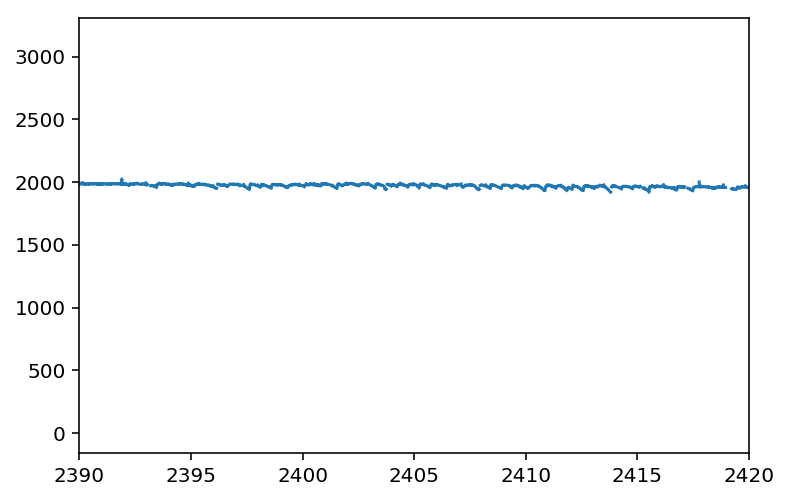

In [12]:
plt.plot(dat['TIME'], dat['SAP_FLUX'])
#plt.plot(dat['TIME'], dat['']/np.nanmedian(dat['PDCSAP_FLUX']))
plt.vlines(dat['TIME'][800], 0.98, 1.04)
#plt.ylim(0.98, 1.04)
plt.xlim(2390, 2420)

### What does the target pixel file look like?

Also downloaded from the link above.

In [13]:
hdu2 = fits.open('../data/ktwo212593538-c06_lpd-targ.fits')

In [14]:
hdu2.info()

Filename: ../data/ktwo212593538-c06_lpd-targ.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      54   ()      
  1  TARGETTABLES    1 BinTableHDU    282   3863R x 13C   [D, E, J, 64J, 64E, 64E, 64E, 64E, 64E, J, E, E, 0E]   
  2  APERTURE      1 ImageHDU        48   (8, 8)   int32   


In [15]:
dat2 = hdu2[1].data

In [16]:
dat2.names

['TIME',
 'TIMECORR',
 'CADENCENO',
 'RAW_CNTS',
 'FLUX',
 'FLUX_ERR',
 'FLUX_BKG',
 'FLUX_BKG_ERR',
 'COSMIC_RAYS',
 'QUALITY',
 'POS_CORR1',
 'POS_CORR2',
 'RB_LEVEL']

In [17]:
dat2['TIME']

array([ 2384.4632718 ,  2384.48370406,  2384.50413641, ...,  2463.33005237,
        2463.35048422,  2463.37091607])

In [18]:
dat2['FLUX'].shape

(3863, 8, 8)

In [19]:
frame300 = dat2['FLUX'][300, :,:]

In [20]:
frame300.shape

(8, 8)

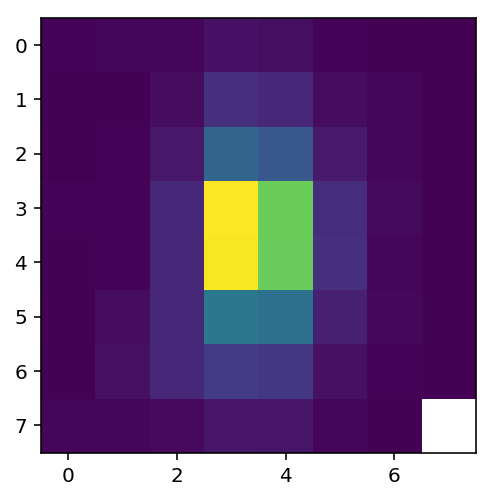

In [21]:
plt.imshow(frame300);

Can we animate it?

In [22]:
from ipywidgets import interact

In [23]:
def plttpf(f):
    plt.plot(dat['TIME'], dat['SAP_FLUX']/np.nanmedian(dat['SAP_FLUX']), '.', alpha=0.3)
    plt.plot(dat['TIME'], dat['PDCSAP_FLUX']/np.nanmedian(dat['PDCSAP_FLUX']), '.', alpha=0.3)
    plt.ylim(0.98, 1.04)
    plt.xlim(2390, 2420)
    plt.vlines(dat['TIME'][f], 0.98, 1.04)
    plt.show()
    plt.imshow(dat2['FLUX'][f, :,:]-dat2['FLUX'][900, :,:])
    plt.show()

In [24]:
interact(plttpf, f=(700,2000,1));

## Spot-check the EVEREST lightcurve of this known transient

In [25]:
import everest

In [26]:
star = everest.Everest(212593538)

INFO  [everest.user.DownloadFile()]: Found cached file.
INFO  [everest.user.load_fits()]: Loading FITS file for 212593538.


In [27]:
star.dvs()

INFO  [everest.user.DownloadFile()]: Found cached file.


INFO  [everest.user.plot()]: Plotting the light curve...


/Users/obsidian/.local/lib/python3.6/site-packages/everest_pipeline-2.0.8-py3.6.egg/everest/user.py:628: RuntimeWarning: invalid value encountered in less
  for i in np.where(flux < ylim[0])[0]:
/Users/obsidian/.local/lib/python3.6/site-packages/everest_pipeline-2.0.8-py3.6.egg/everest/user.py:644: RuntimeWarning: invalid value encountered in greater
  for i in np.where(flux > ylim[1])[0]:


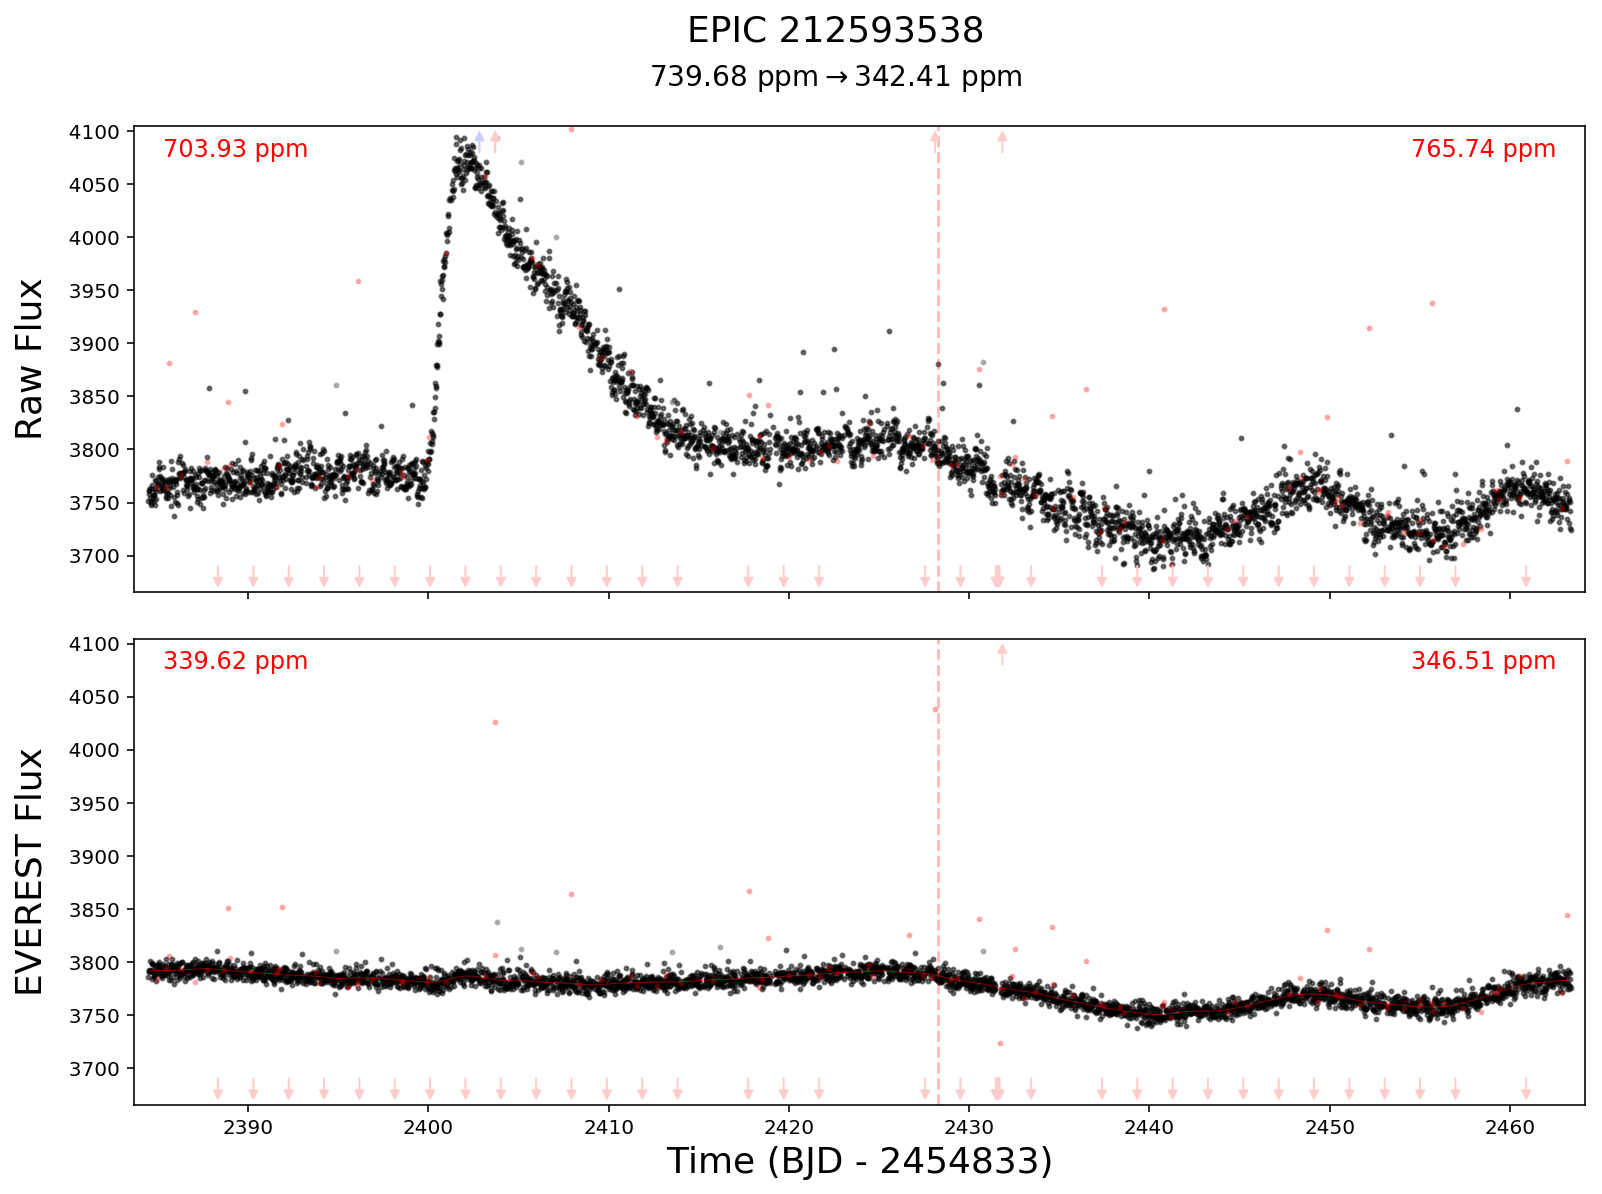

In [28]:
star.plot()

INFO  [everest.missions.k2.pipelines.get()]: Downloading everest1 light curve for 212593538...


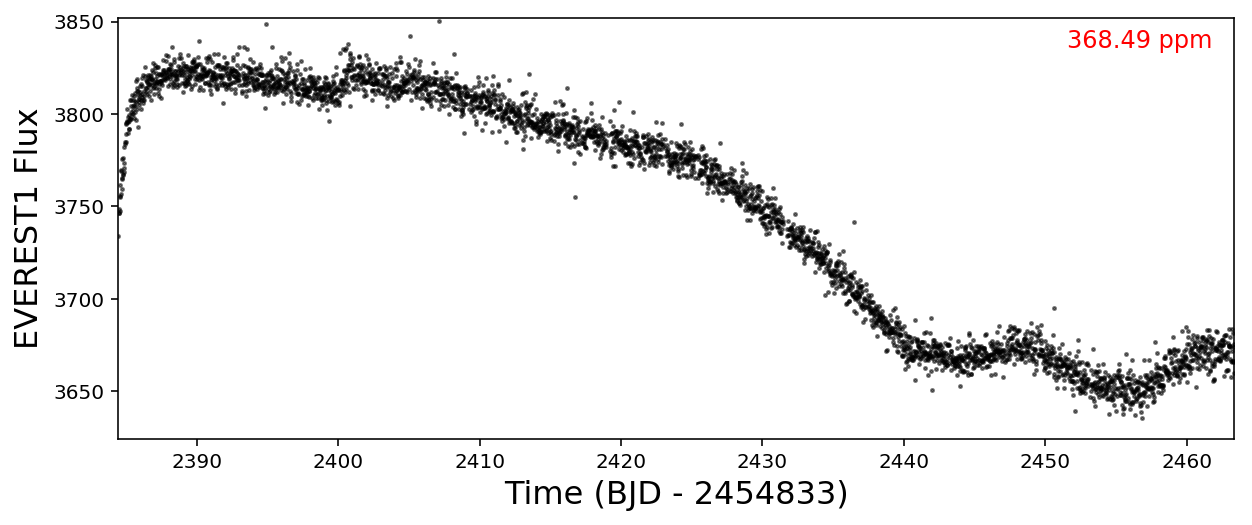

In [29]:
star.plot_pipeline('everest1')

INFO  [everest.missions.k2.pipelines.get()]: Downloading k2sff light curve for 212593538...


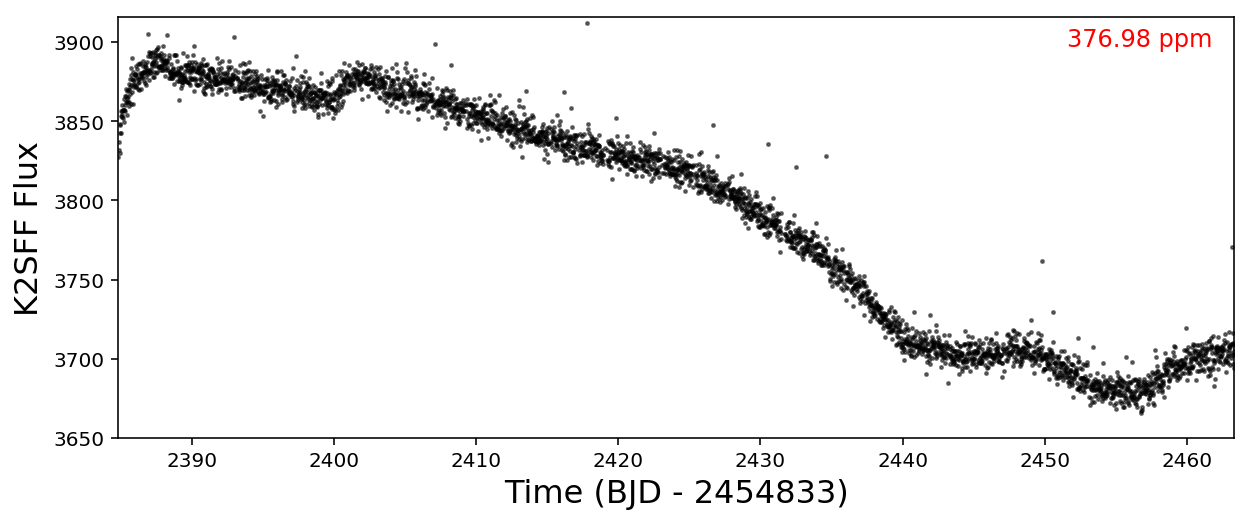

In [30]:
star.plot_pipeline('k2sff')

### Compare Kepler Pipeline's PDC to EVEREST's "Raw"

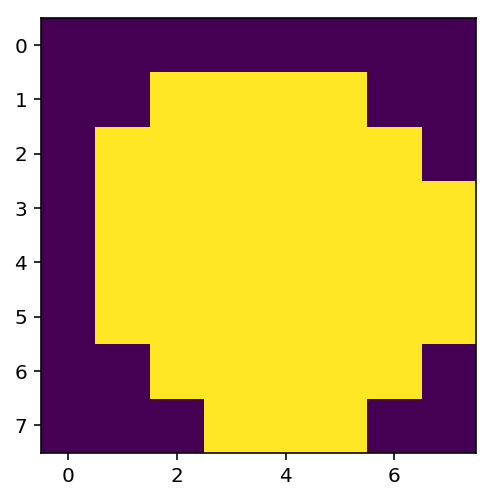

In [31]:
plt.imshow(star.aperture)

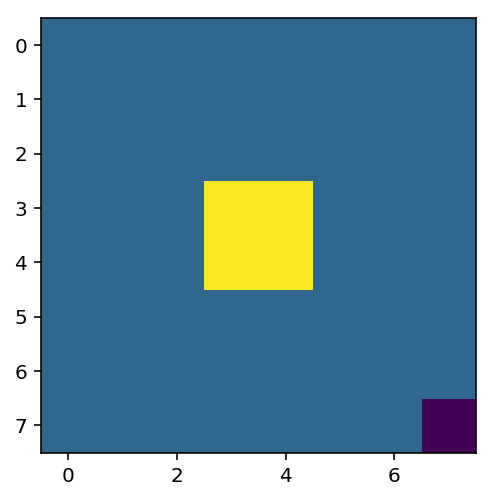

In [32]:
plt.imshow(hdu_ap.data)

In [33]:
star.aperture

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 1, 0, 0]])

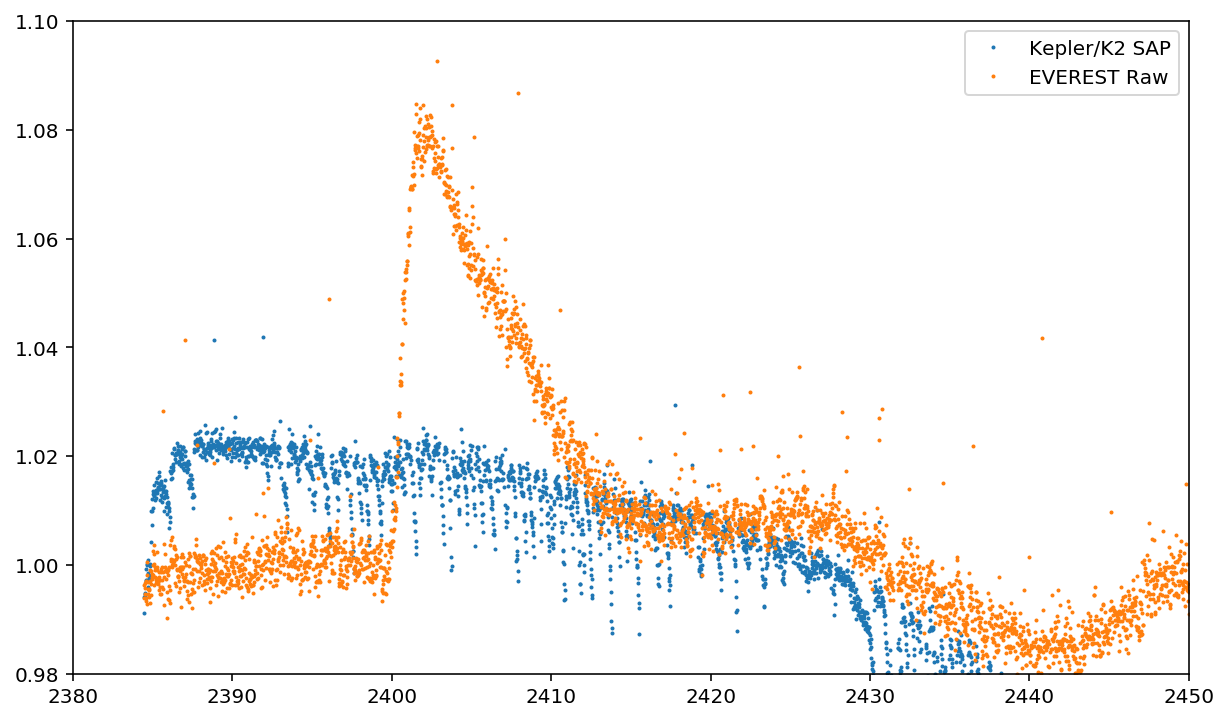

In [34]:
plt.figure(figsize=(10, 6))
#plt.plot(dat['TIME'], dat['PDCSAP_FLUX']/np.nanmedian(dat['PDCSAP_FLUX']), '.', label = 'Kepler/K2 PDC', ms=2)
plt.plot(dat['TIME'], dat['SAP_FLUX']/np.nanmedian(dat['SAP_FLUX']), '.', label = 'Kepler/K2 SAP', ms=2)
plt.plot(star.time, star.fraw/np.nanmedian(star.fraw), '.', label='EVEREST Raw', ms=2)
plt.ylim(0.98, 1.1)
plt.xlim(2380, 2450)
plt.legend(loc='best');

In [35]:
datacube = dat2['FLUX']

In [36]:
ev_masked = datacube*star.aperture

In [37]:
ev_masked.shape

(3863, 8, 8)

In [38]:
manual_lc = np.nansum(datacube*star.aperture, axis=(1,2))

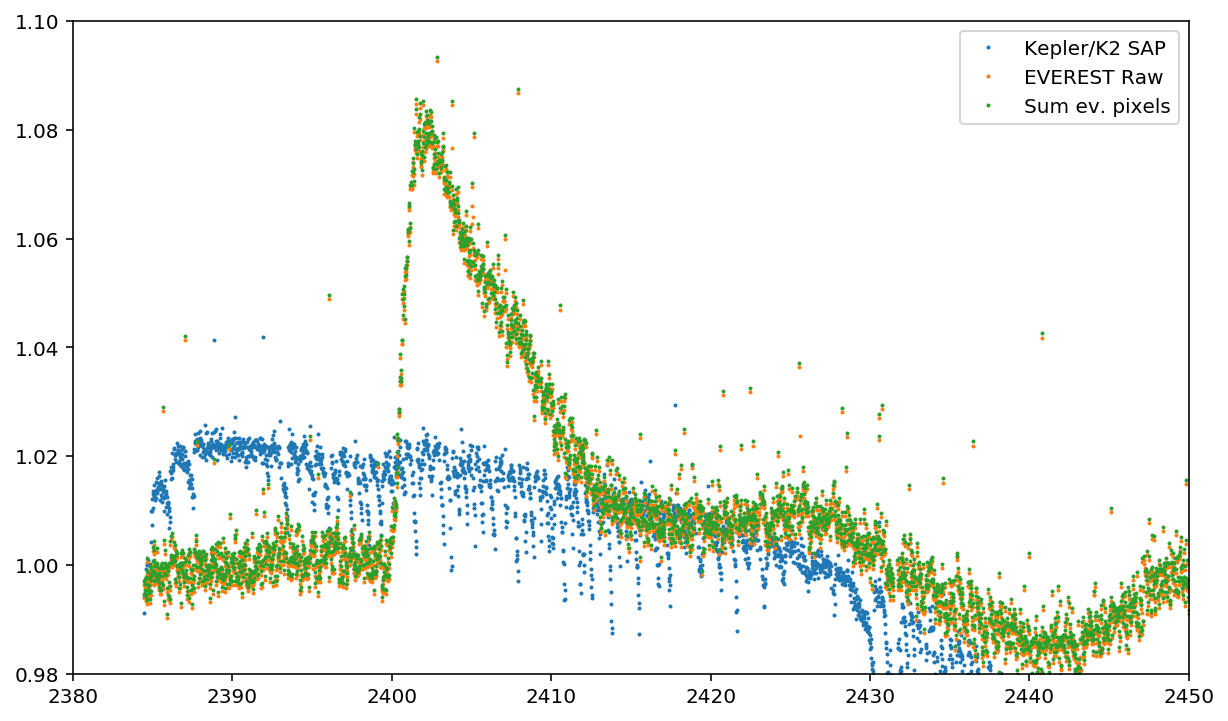

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(dat['TIME'], dat['SAP_FLUX']/np.nanmedian(dat['SAP_FLUX']), '.', label = 'Kepler/K2 SAP', ms=2)
plt.plot(star.time, star.fraw/np.nanmedian(star.fraw), '.', label='EVEREST Raw', ms=2)
plt.plot(star.time, manual_lc/np.nanmedian(manual_lc), '.', label='Sum ev. pixels', ms=2)
plt.ylim(0.98, 1.1)
plt.xlim(2380, 2450)
plt.legend(loc='best');

In [40]:
3863/12

321.9166666666667

## Try to "freeze" the motion by samping on 6 hour timescales.

In [41]:
ev_masked.shape

(3863, 8, 8)

In [42]:
ev_masked[:-12:12,:,:].shape

(321, 8, 8)

In [43]:
ev_masked[12:-1:12,:,:].shape

(321, 8, 8)

In [44]:
diffed = ev_masked[:-12:12,:,:] - ev_masked[11::12,:,:]

What the sum along the time axis?

In [45]:
np.nanstd(diffed)

22.18770189048119

In [46]:
n_steps = 12

In [47]:
std_vec = np.zeros(n_steps)
for i in range(n_steps):
    std_vec[i] = np.nanstd(ev_masked[i:-n_steps+i:n_steps,:,:] - ev_masked[i+n_steps*80,:,:])

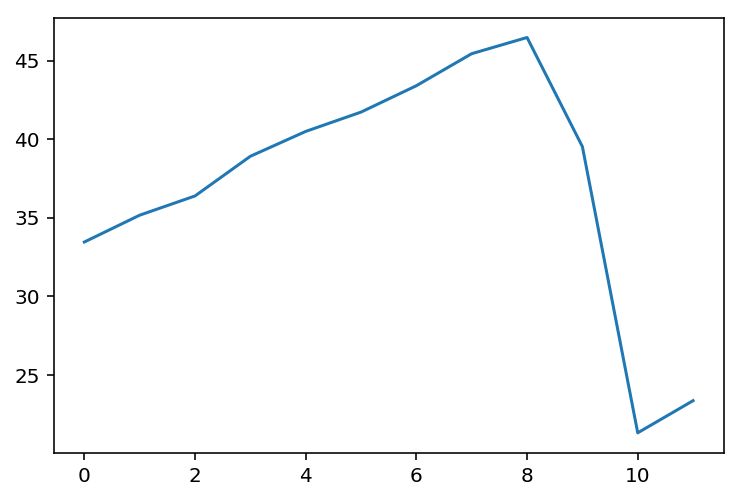

In [48]:
plt.plot(std_vec)

In [49]:
i = 10
n_steps = 12
template = 45
diffed = ev_masked[i:-n_steps+i:n_steps,:,:] - ev_masked[i+n_steps*template,:,:]

In [50]:
def pltdif(f):
    plt.plot(star.time[::12], manual_lc[::12]/np.nanmedian(manual_lc[::12]), '.', label='Sum ev. pixels', ms=4)
    plt.plot(star.time, manual_lc/np.nanmedian(manual_lc), '.', label='Sum ev. pixels', ms=1, alpha=0.3)
    plt.ylim(0.98, 1.1)
    plt.xlim(2385, 2440)
    plt.vlines(star.time[0+f*12], 0.98, 1.1)
    plt.show()
    plt.imshow(diffed[f, :,:])
    plt.show()

In [51]:
interact(pltdif, f=(0,321,1));

In [52]:
diffed.shape

(321, 8, 8)

In [54]:
star.dvs()

INFO  [everest.user.DownloadFile()]: Found cached file.


Neat!

<!--NAVIGATION-->
< [Spot-check Everest Validation Summaries for KEGS](01.06-Everest_KEGS_DVS.ipynb) | [Contents](Index.ipynb) | [Supernova Searches](02.00-Supernova_searches.ipynb) >